In [1]:
import pandas as pd

In [2]:
bleu = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_bleu.csv")
rouge1 = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_rouge1.csv")
rouge2 = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_rouge2.csv")
rougel = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_rougel.csv")
meteor = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_meteor.csv")
ter = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_ter.csv")
chrf = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_chrf.csv")
chrfplus = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_chrfplus.csv")
bert = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_bert.csv")
wms = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_WMS.csv")
sms = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_SMS.csv")
wisdm = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_wisdm.csv")
bart = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_bart.csv")
bleurt = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_bleurt.csv")
bem = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_bem.csv")
prometheus = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_prometheus.csv")
llm = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_llm.csv")
faith = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_faithfulness.csv")
relevance = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_relevancy.csv")
rsim = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_rsim.csv")
correctness = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_correctness.csv")
consistency = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_consistency.csv")
tsim = pd.read_csv("/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/Analysis 3/scores/survey_tsim.csv")

In [3]:
rouge1.rename(columns={'rouge1_correct_answer': 'score_correct_answer', 'rouge1_phi3_answer': 'score_phi3_answer', 'rouge1_llama3_8B_answer':'score_llama3_8B_answer', 'rouge1_llama3_70B_answer':'score_llama3_70B_answer', 'rouge1_mistral_answer':'score_mistral_answer', 'rouge1_gemma2_9B_answer':'score_gemma2_9B_answer', 'rouge1_gemma2_27B_answer_answer':'score_gemma2_27B_answer_answer' }, inplace=True)
rouge2.rename(columns={'rouge2_correct_answer': 'score_correct_answer', 'rouge2_phi3_answer': 'score_phi3_answer', 'rouge2_llama3_8B_answer':'score_llama3_8B_answer', 'rouge2_llama3_70B_answer':'score_llama3_70B_answer', 'rouge2_mistral_answer':'score_mistral_answer', 'rouge2_gemma2_9B_answer':'score_gemma2_9B_answer', 'rouge2_gemma2_27B_answer_answer':'score_gemma2_27B_answer_answer' }, inplace=True)
rougel.rename(columns={'rougel_correct_answer': 'score_correct_answer', 'rougel_phi3_answer': 'score_phi3_answer', 'rougel_llama3_8B_answer':'score_llama3_8B_answer', 'rougel_llama3_70B_answer':'score_llama3_70B_answer', 'rougel_mistral_answer':'score_mistral_answer', 'rougel_gemma2_9B_answer':'score_gemma2_9B_answer', 'rougel_gemma2_27B_answer_answer':'score_gemma2_27B_answer_answer' }, inplace=True)
prometheus.rename(columns={'score_gemma2_27B_answer': 'score_gemma2_27B_answer_answer'}, inplace=True)
llm.rename(columns={'score_gemma2_27B_answer': 'score_gemma2_27B_answer_answer'}, inplace=True)

In [4]:
# List of dataframes and their names
dataframes = [bleu, rouge1, rouge2, rougel, chrf, chrfplus, ter, meteor, bert, wms, sms, wisdm, bleurt, bem, bart, prometheus, faith, relevance, consistency, correctness, rsim, tsim, llm]
df_names = ['bleu', 'rouge1', 'rouge2', 'tougel', 'chrf', 'chrfplus', 'ter', 'meteor', 'bert', 'wmd', 'smd', 'wisdm', 'bleurt', 'bem', 'bart', 'prometheus', 'faith', 'relevancy', 'consistency', 'correctness', 'rsim', 'tonics', 'llm']

# Columns of interest
columns_of_interest = [
    'score_correct_answer', 'score_phi3_answer', 'score_llama3_8B_answer',
    'score_llama3_70B_answer', 'score_mistral_answer',
    'score_gemma2_9B_answer', 'score_gemma2_27B_answer_answer'
]

# Initialize a dictionary to store ranks for each DataFrame
ranks_dict = {}

# Loop through each DataFrame and calculate ranks
for df, name in zip(dataframes, df_names):
    # Calculate mean of the columns of interest
    means = df[columns_of_interest].mean()
    
    # Rank the columns based on the means (highest mean gets rank 1)
    ranked_columns = means.rank(ascending=False, method='min').sort_values().index.tolist()
    
    # Create a ranking from 1 (highest) to 7 (lowest)
    ranking = {column: rank for rank, column in enumerate(ranked_columns, start=1)}
    
    # Store ranks in the dictionary using the DataFrame name
    ranks_dict[name] = pd.Series(ranking)

# Convert the dictionary of ranks into a DataFrame
rank_df = pd.DataFrame(ranks_dict)


In [5]:
rank_df

,bleu,rouge1,rouge2,tougel,chrf,chrfplus,ter,meteor,bert,wmd,...,bem,bart,prometheus,faith,relevancy,consistency,correctness,rsim,tonics,llm
score_correct_answer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,3,1,1,1,1,3
score_gemma2_27B_answer_answer,6,7,6,7,6,6,7,6,6,6,...,5,6,7,6,7,6,6,6,7,5
score_gemma2_9B_answer,7,6,7,6,7,7,6,7,7,7,...,7,7,5,7,6,7,4,7,6,4
score_llama3_70B_answer,3,3,4,3,2,2,5,3,4,3,...,3,5,6,4,5,5,7,4,5,7
score_llama3_8B_answer,5,5,5,5,5,5,3,5,5,5,...,4,4,4,2,2,4,5,5,4,6
score_mistral_answer,4,4,3,4,4,4,4,4,3,4,...,6,3,2,5,4,3,2,3,3,2
score_phi3_answer,2,2,2,2,3,3,2,2,2,2,...,2,2,3,3,1,2,3,2,2,1


In [6]:
# Columns of interest
columns_interest = [
    'correct', 'phi3', 'llama3_8B', 'llama3_70B', 'mistral', 'gemma2_9B', 'gemma2_27B'
]

# Initialize a dictionary to store ranks for each DataFrame
ranks = {}

# Calculate mean of the columns of interest
means = bleu[columns_interest].mean()

# Rank the columns based on the means (highest mean gets rank 1)
ranked_columns = means.rank(ascending=False, method='min').sort_values().index.tolist()

# Create a ranking from 1 (highest) to 7 (lowest)
ranking = {column: rank for rank, column in enumerate(ranked_columns, start=1)}

# Store ranks in the dictionary using the DataFrame name
ranks['original'] = pd.Series(ranking)

# Convert the dictionary of ranks into a DataFrame
rank_original = pd.DataFrame(ranks)


In [7]:
rank_original

,original
llama3_70B,1
gemma2_27B,2
gemma2_9B,3
llama3_8B,4
mistral,5
phi3,6
correct,7


In [8]:
rank_df['humans'] = ['7', '2', '3', '1', '4', '5', '6']

In [9]:
rank_df['humans'] = rank_df['humans'].astype('int64')

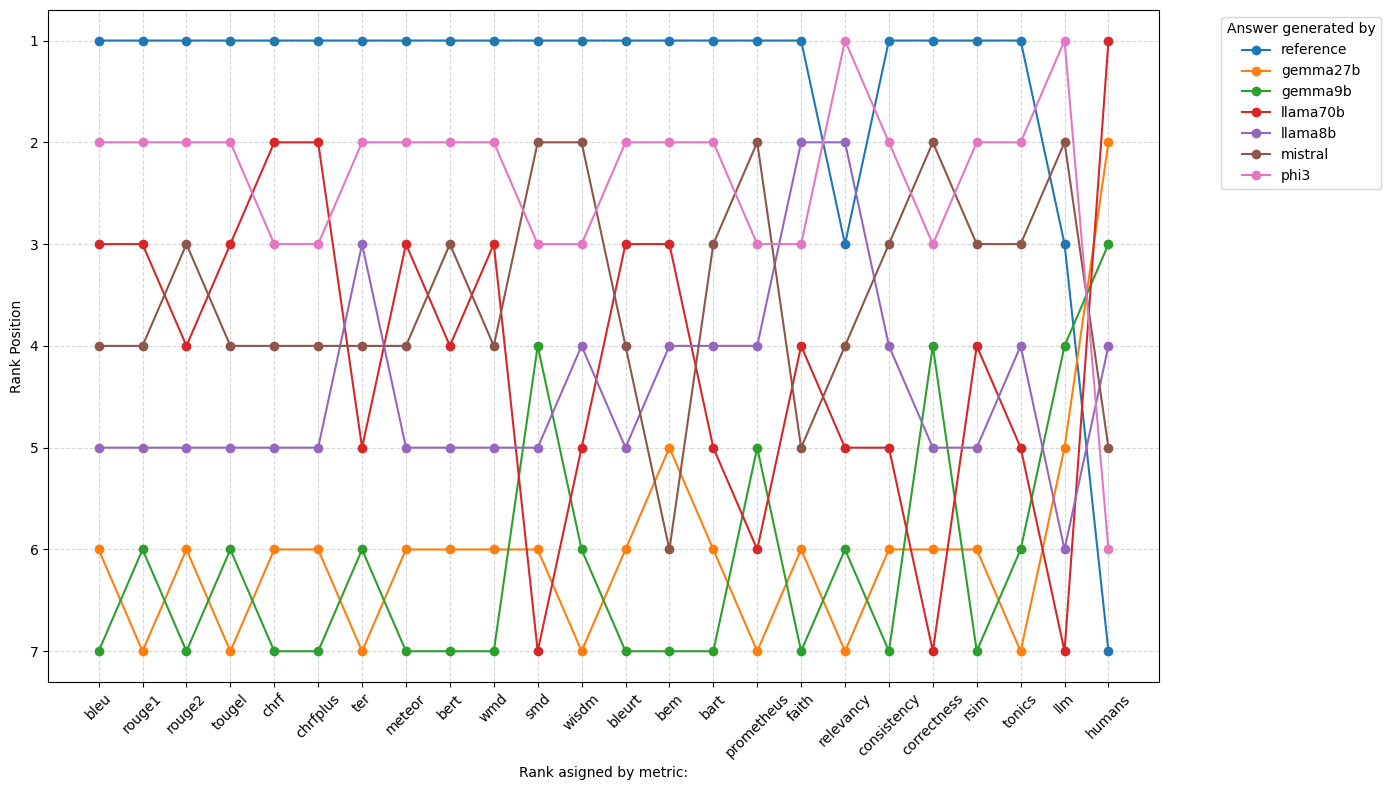

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific names for each row
row_names = ['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3']  

# Set the figure size
plt.figure(figsize=(14, 8))

# Iterate through each row to plot each line
for i in range(rank_df.shape[0]):
    plt.plot(rank_df.columns, rank_df.iloc[i], marker='o', label=row_names[i])  # Include all columns

# Set the labels and title
plt.xlabel('Rank asigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()




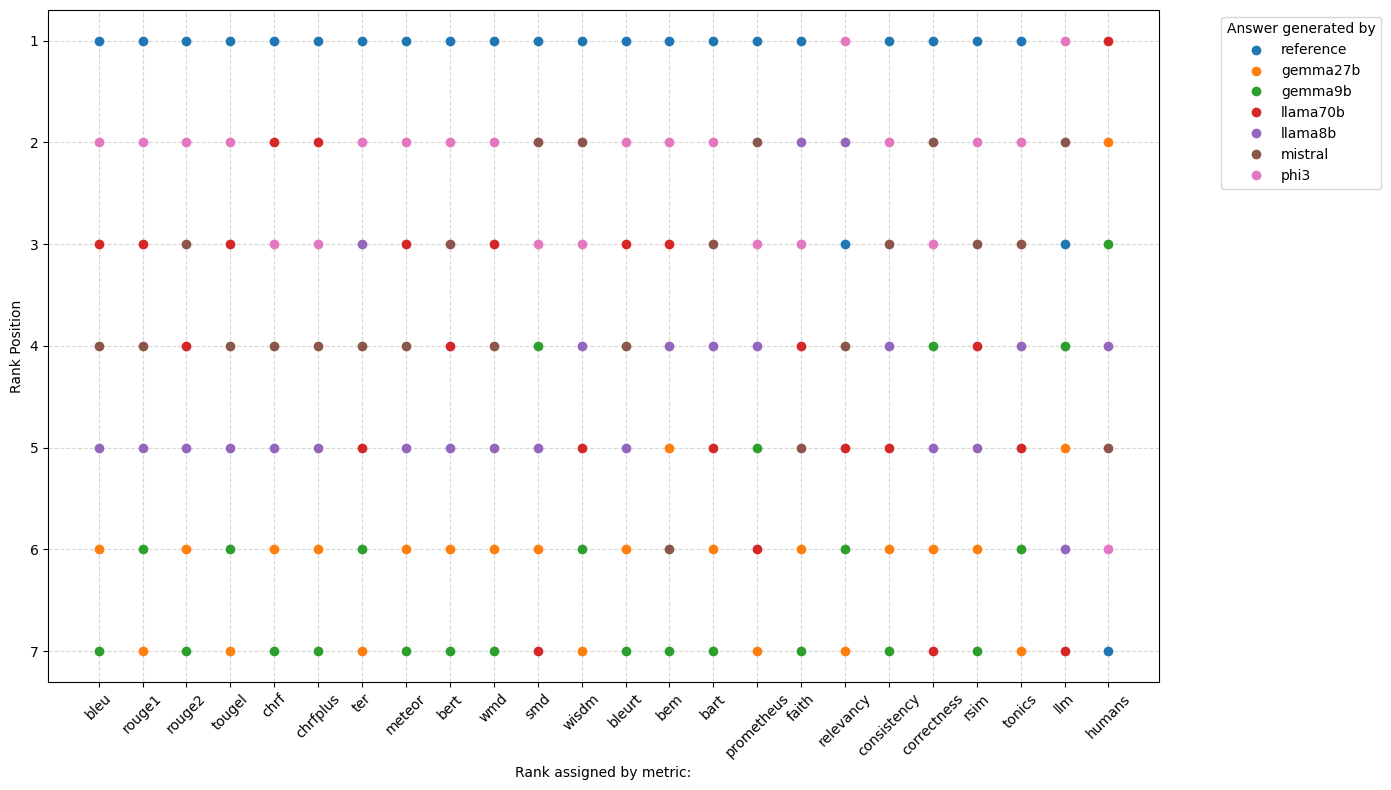

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific names for each row
row_names = ['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3']  

# Set the figure size
plt.figure(figsize=(14, 8))

# Iterate through each row to plot each point without connecting lines
for i in range(rank_df.shape[0]):
    plt.plot(rank_df.columns, rank_df.iloc[i], marker='o', linestyle='', label=row_names[i])  # Set linestyle to ''

# Set the labels and title
plt.xlabel('Rank assigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

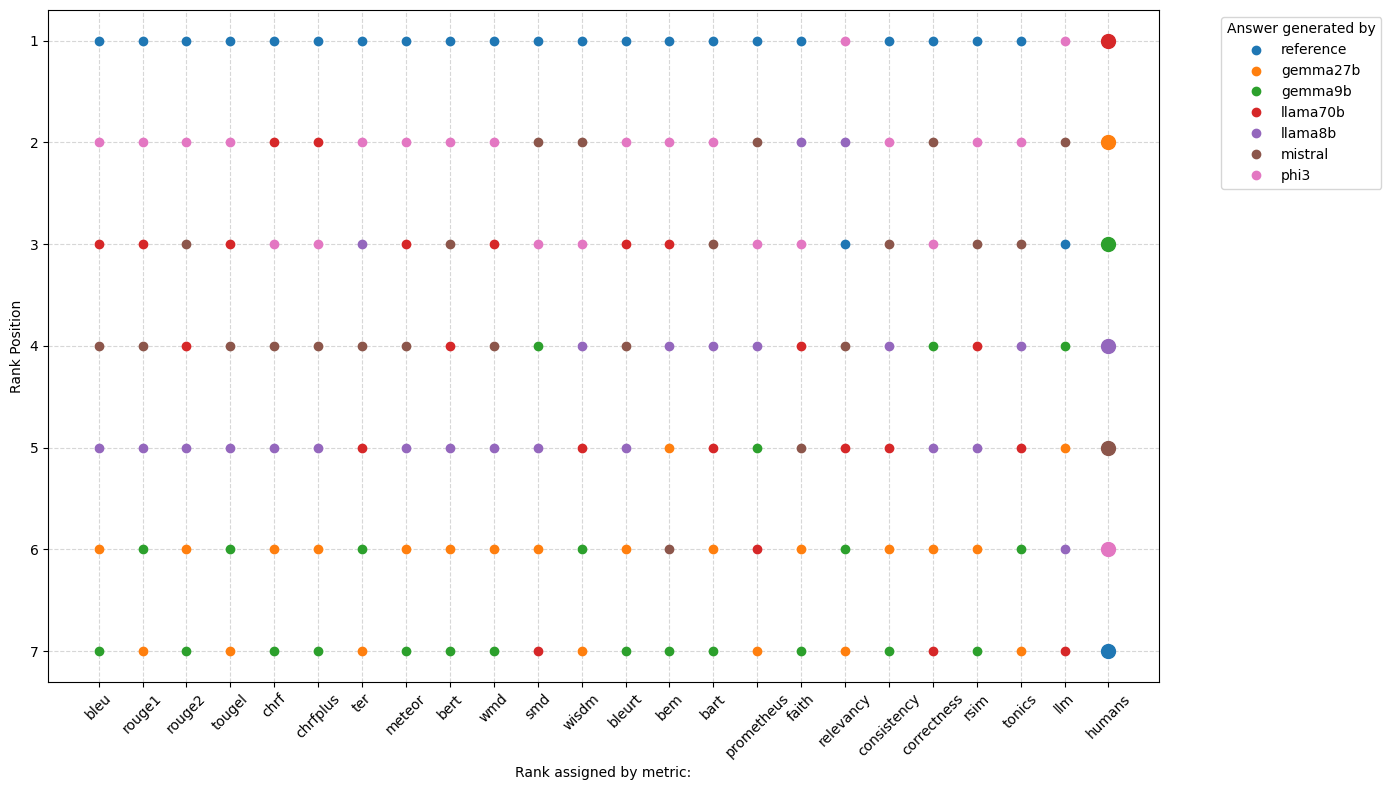

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific names for each row
row_names = ['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3']  

# Set the figure size
plt.figure(figsize=(14, 8))

# Iterate through each row to plot each point without connecting lines
for i in range(rank_df.shape[0]):
    # Plot all points with a smaller marker size
    plt.plot(rank_df.columns, rank_df.iloc[i], marker='o', linestyle='', markersize=6, label=row_names[i])

# Make the dots in the "humans" column larger
if 'humans' in rank_df.columns:
    # Plot each row individually for the "humans" column with a larger marker size
    for i in range(rank_df.shape[0]):
        plt.plot('humans', rank_df.at[rank_df.index[i], 'humans'], marker='o', linestyle='', markersize=10, 
                 color=plt.gca().lines[i].get_color())

# Set the labels and title
plt.xlabel('Rank assigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


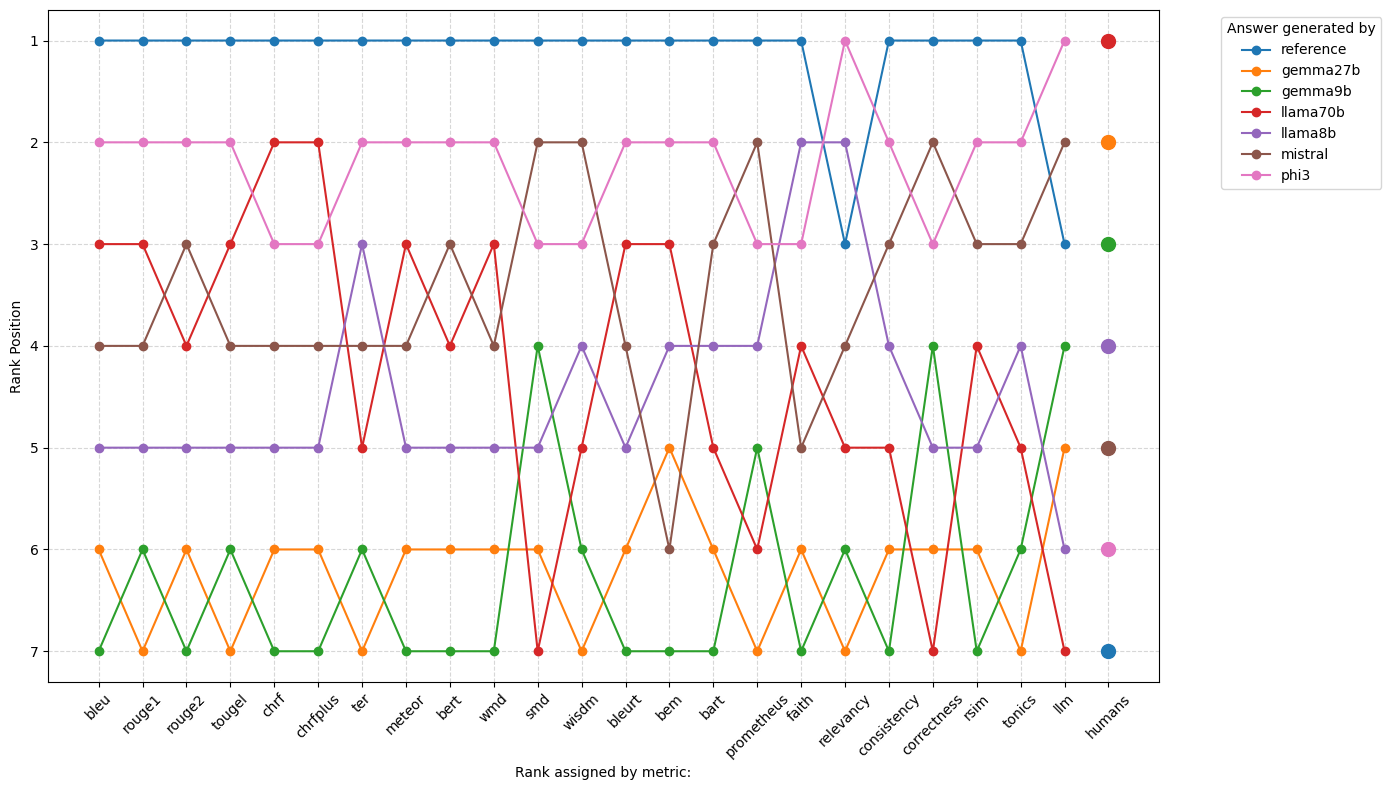

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific names for each row
row_names = ['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3']  

# Set the figure size
plt.figure(figsize=(14, 8))

# Determine the columns up to and excluding the "humans" column
columns_up_to_llm = rank_df.columns[:rank_df.columns.get_loc('humans')]

# Iterate through each row to plot each point and connect them with lines only up to "llm"
for i in range(rank_df.shape[0]):
    # Plot all points up to the "llm" column with lines
    plt.plot(columns_up_to_llm, rank_df.loc[rank_df.index[i], columns_up_to_llm], 
             marker='o', linestyle='-', markersize=6, label=row_names[i])

# Make the dots in the "humans" column larger and without connecting lines
if 'humans' in rank_df.columns:
    for i in range(rank_df.shape[0]):
        plt.plot('humans', rank_df.at[rank_df.index[i], 'humans'], marker='o', 
                 linestyle='', markersize=10, color=plt.gca().lines[i].get_color())

# Set the labels and title
plt.xlabel('Rank assigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


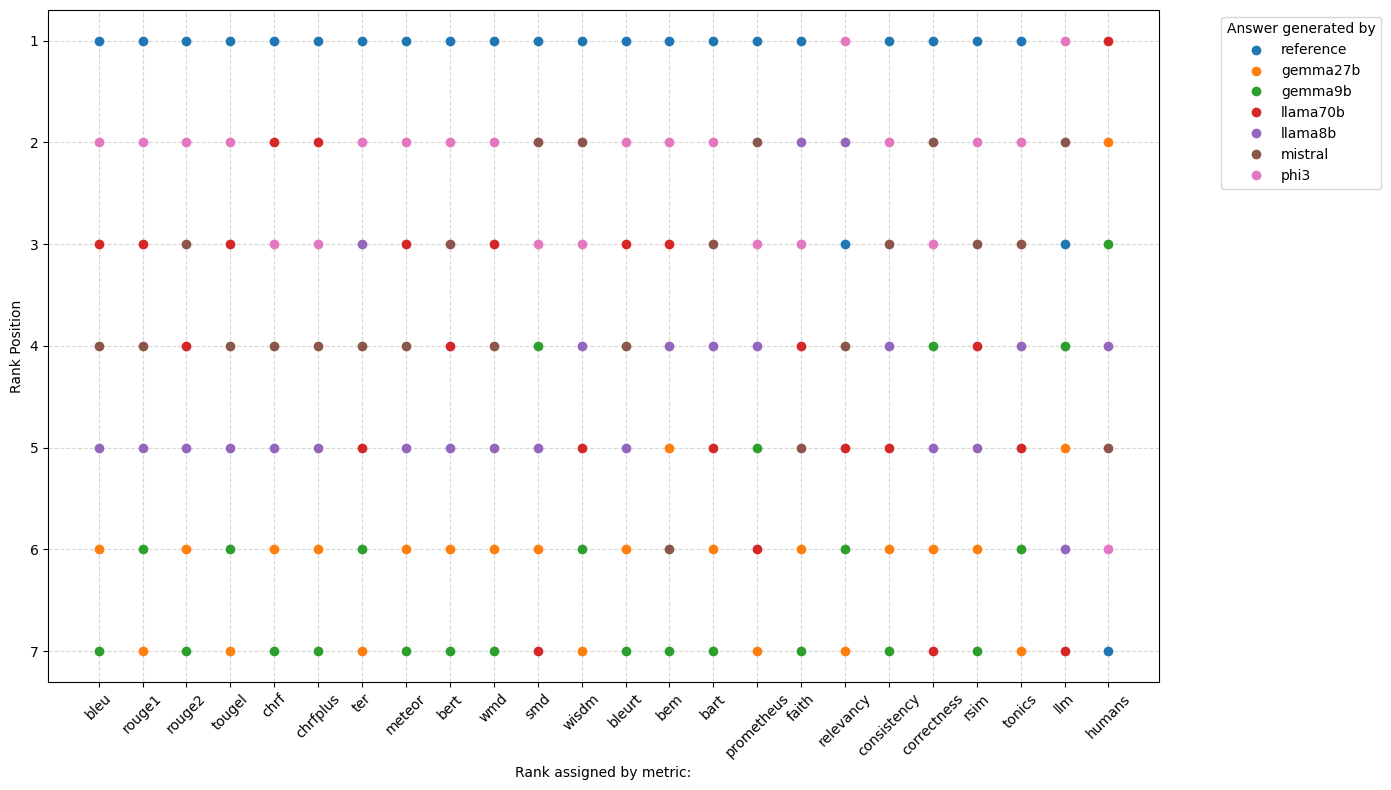

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific names for each row
row_names = ['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3']  

# Set the figure size
plt.figure(figsize=(14, 8))

# Iterate through each row to plot each point without connecting lines
for i in range(rank_df.shape[0]):
    # Check if the column is "humans" to set a larger marker size
    if 'humans' in rank_df.columns:
        plt.plot(rank_df.columns, rank_df.iloc[i], marker='o', linestyle='', markersize=6, label=row_names[i])  # Default size for other points
    else:
        plt.plot(rank_df.columns, rank_df.iloc[i], marker='o', linestyle='', markersize=10, label=row_names[i])  # Larger size for "humans" column

# Set the labels and title
plt.xlabel('Rank assigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



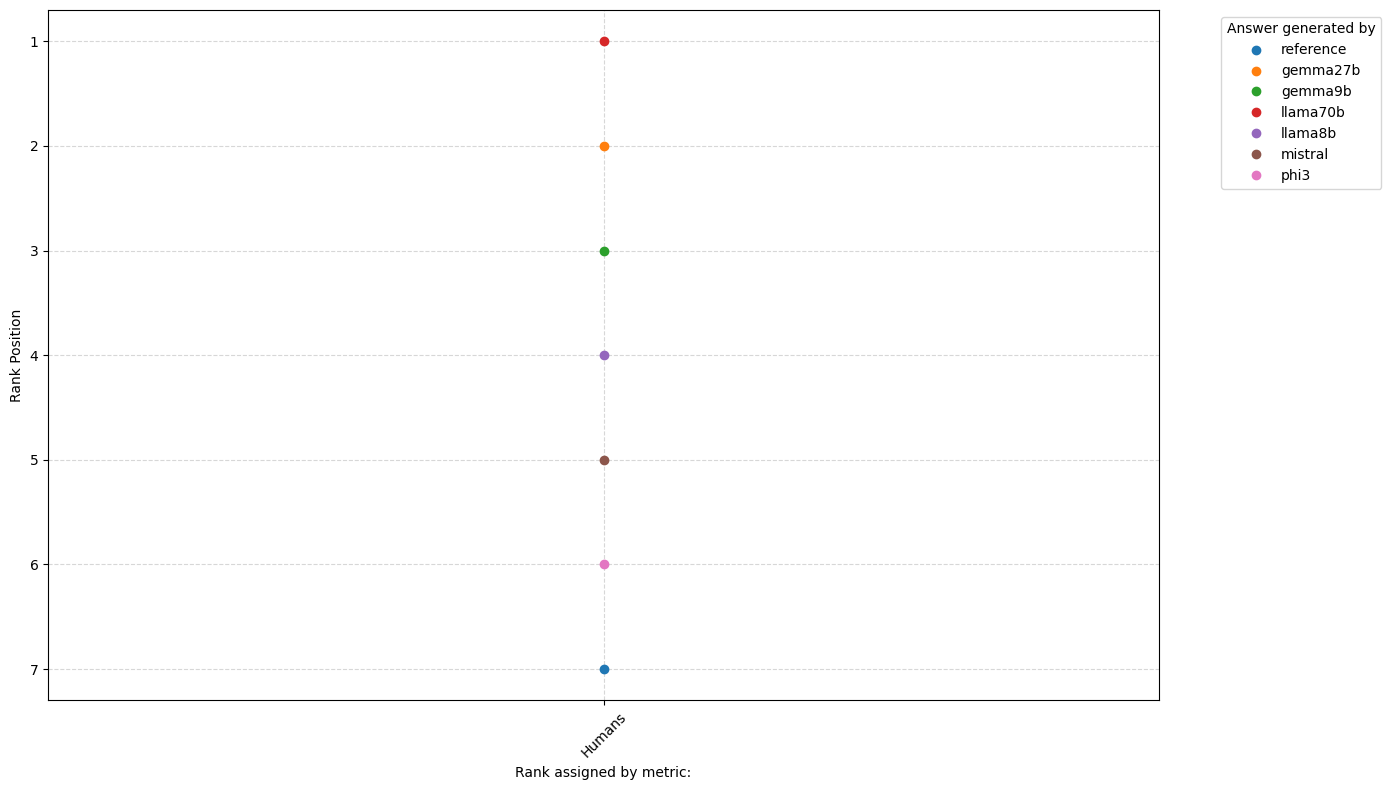

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the 'humans' DataFrame with the specified values
humans = pd.DataFrame({
    'Rank Position': [7, 2, 3, 1, 4, 5, 6]
}, index=['reference', 'gemma27b', 'gemma9b', 'llama70b', 'llama8b', 'mistral', 'phi3'])

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot each point as dots on a single line, keeping X constant as "Humans"
for i, (label, value) in enumerate(humans['Rank Position'].items()):
    plt.plot(['Humans'], [value], marker='o', linestyle='', label=label)  # Each label gets its default color

# Set the labels and title
plt.xlabel('Rank assigned by metric:')
plt.ylabel('Rank Position')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(range(1, 8))  # Set Y-axis ticks from 1 to 7
plt.gca().invert_yaxis()  # Invert the Y-axis

# Show legend
plt.legend(title='Answer generated by', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
rank_df

,bleu,rouge1,rouge2,tougel,chrf,chrfplus,ter,meteor,bert,wmd,...,bart,prometheus,faith,relevancy,consistency,correctness,rsim,tonics,llm,humans
score_correct_answer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,3,1,1,1,1,3,7
score_gemma2_27B_answer_answer,6,7,6,7,6,6,7,6,6,6,...,6,7,6,7,6,6,6,7,5,2
score_gemma2_9B_answer,7,6,7,6,7,7,6,7,7,7,...,7,5,7,6,7,4,7,6,4,3
score_llama3_70B_answer,3,3,4,3,2,2,5,3,4,3,...,5,6,4,5,5,7,4,5,7,1
score_llama3_8B_answer,5,5,5,5,5,5,3,5,5,5,...,4,4,2,2,4,5,5,4,6,4
score_mistral_answer,4,4,3,4,4,4,4,4,3,4,...,3,2,5,4,3,2,3,3,2,5
score_phi3_answer,2,2,2,2,3,3,2,2,2,2,...,2,3,3,1,2,3,2,2,1,6


In [17]:
rank_df.columns

Index(['bleu', 'rouge1', 'rouge2', 'tougel', 'chrf', 'chrfplus', 'ter',
       'meteor', 'bert', 'wmd', 'smd', 'wisdm', 'bleurt', 'bem', 'bart',
       'prometheus', 'faith', 'relevancy', 'consistency', 'correctness',
       'rsim', 'tonics', 'llm', 'humans'],
      dtype='object')

In [21]:
import pandas as pd
import scipy.stats as stats

# Computing Spearman correlation with the 'humans' column
correlations = {
    'Metric': [],
    'Spearman Correlation': [],
    'P-Value': []
}

for col in rank_df.columns[:-1]:  # Exclude the 'humans' column itself
    corr, p_value = stats.spearmanr(rank_df[col], rank_df['humans'])
    correlations['Metric'].append(col)
    correlations['Spearman Correlation'].append(corr)
    correlations['P-Value'].append(p_value)

# Convert to DataFrame for easy viewing
correlations_df = pd.DataFrame(correlations)

# Display the DataFrame
print(correlations_df)

         Metric  Spearman Correlation   P-Value
0          bleu             -0.607143  0.148231
1        rouge1             -0.642857  0.119392
2        rouge2             -0.750000  0.052181
3        tougel             -0.642857  0.119392
4          chrf             -0.428571  0.337368
5      chrfplus             -0.428571  0.337368
6           ter             -0.857143  0.013697
7        meteor             -0.607143  0.148231
8          bert             -0.750000  0.052181
9           wmd             -0.607143  0.148231
10          smd             -0.928571  0.002519
11        wisdm             -0.857143  0.013697
12       bleurt             -0.607143  0.148231
13          bem             -0.464286  0.293934
14         bart             -0.857143  0.013697
15   prometheus             -0.928571  0.002519
16        faith             -0.607143  0.148231
17    relevancy             -0.714286  0.071344
18  consistency             -0.857143  0.013697
19  correctness             -0.928571  0